# Prediction of Sales for all strategy1,strategy2,strategy3

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [318]:
df=pd.read_csv("data.csv")

In [319]:
df.head()

,Unnamed: 0,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,1,XYZ-987002,Pharmacy,700,25,3,2013-10-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2,XYZ-987002,Pharmacy,700,25,3,2013-11-01,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,3,XYZ-987002,Pharmacy,700,25,3,2013-12-01,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,4,XYZ-987002,Pharmacy,700,25,3,2014-01-01,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,5,XYZ-987002,Pharmacy,700,25,3,2014-02-01,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [320]:
df.shape

(2976, 18)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2976 non-null   int64  
 1   accID        2976 non-null   object 
 2   accType      2976 non-null   object 
 3   accSize      2976 non-null   int64  
 4   accTargets   2976 non-null   int64  
 5   district     2976 non-null   int64  
 6   month        2976 non-null   object 
 7   sales        2976 non-null   int64  
 8   qty          2976 non-null   int64  
 9   strategy1    2976 non-null   float64
 10  strategy2    2976 non-null   float64
 11  strategy3    2976 non-null   float64
 12  salesVisit1  2976 non-null   float64
 13  salesVisit2  2976 non-null   float64
 14  salesVisit3  2976 non-null   float64
 15  salesVisit4  2976 non-null   float64
 16  salesVisit5  2976 non-null   float64
 17  compBrand    2976 non-null   int64  
dtypes: float64(8), int64(7), object(3)
memory usage:

Check for the existence of null values

In [322]:
df.isnull().sum()

Unnamed: 0     0
accID          0
accType        0
accSize        0
accTargets     0
district       0
month          0
sales          0
qty            0
strategy1      0
strategy2      0
strategy3      0
salesVisit1    0
salesVisit2    0
salesVisit3    0
salesVisit4    0
salesVisit5    0
compBrand      0
dtype: int64

Drop the columns which does not describe much about the sales 

In [323]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,XYZ-987002,Pharmacy,700,25,3,2013-10-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,XYZ-987002,Pharmacy,700,25,3,2013-11-01,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,XYZ-987002,Pharmacy,700,25,3,2013-12-01,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,XYZ-987002,Pharmacy,700,25,3,2014-01-01,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,XYZ-987002,Pharmacy,700,25,3,2014-02-01,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Check for Cardinality of the features existed in the data set

In [324]:
df['accID'].nunique()

124

In [325]:
df['accID'].unique()

array(['XYZ-987002', 'XYZ-987005', 'XYZ-987006', 'XYZ-987007',
       'XYZ-987008', 'XYZ-987009', 'XYZ-987010', 'XYZ-987014',
       'XYZ-987015', 'XYZ-987016', 'XYZ-987017', 'XYZ-987019',
       'XYZ-987021', 'XYZ-987022', 'XYZ-987023', 'XYZ-987024',
       'XYZ-987025', 'XYZ-987026', 'XYZ-987027', 'XYZ-987029',
       'XYZ-987030', 'XYZ-987032', 'XYZ-987033', 'XYZ-987034',
       'XYZ-987035', 'XYZ-987036', 'XYZ-987037', 'XYZ-987039',
       'XYZ-987043', 'XYZ-987045', 'XYZ-987047', 'XYZ-987049',
       'XYZ-987050', 'XYZ-987052', 'XYZ-987054', 'XYZ-987056',
       'XYZ-987059', 'XYZ-987060', 'XYZ-987061', 'XYZ-987062',
       'XYZ-987063', 'XYZ-987065', 'XYZ-987067', 'XYZ-987069',
       'XYZ-987070', 'XYZ-987071', 'XYZ-987072', 'XYZ-987075',
       'XYZ-987077', 'XYZ-987079', 'XYZ-987081', 'XYZ-987082',
       'XYZ-987083', 'XYZ-987085', 'XYZ-987086', 'XYZ-987087',
       'XYZ-987088', 'XYZ-987089', 'XYZ-987090', 'XYZ-987091',
       'XYZ-987092', 'XYZ-987093', 'XYZ-987095', 'XYZ-9

In [326]:
df['accType'].nunique()

4

In [327]:
df['accType'].unique()

array(['Pharmacy', 'Hospital', 'Polyclinic', 'Private Clinic'],
      dtype=object)

In [328]:
df1=df.copy()

Furthur extension of month column inorder to get much more insights of sales for each of individual year/month/day features

In [329]:
df1['year'] = pd.DatetimeIndex(df['month']).year
df1['month'] = pd.DatetimeIndex(df['month']).month
df1['day'] = pd.DatetimeIndex(df['month']).day
df1.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,year,day
0,XYZ-987002,Pharmacy,700,25,3,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013,1
1,XYZ-987002,Pharmacy,700,25,3,11,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4,2013,1
2,XYZ-987002,Pharmacy,700,25,3,12,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013,1
3,XYZ-987002,Pharmacy,700,25,3,1,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4,2014,1
4,XYZ-987002,Pharmacy,700,25,3,2,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2014,1


In [330]:
df1.shape

(2976, 19)

In [331]:
categorical=[var for var in df.columns if df1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
df1[categorical].head()

There are 2 categorical variables


,accID,accType
0,XYZ-987002,Pharmacy
1,XYZ-987002,Pharmacy
2,XYZ-987002,Pharmacy
3,XYZ-987002,Pharmacy
4,XYZ-987002,Pharmacy


In [332]:
#numerical variables
numerical=[var for var in df.columns if df1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
df1[numerical].head(5)

There are 15 numerical variables


,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,700,25,3,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,700,25,3,11,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,700,25,3,12,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,700,25,3,1,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,700,25,3,2,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [333]:
continuous=[var for var in numerical if var not in['sales']]
print("Continuous feature Count {}".format(len(continuous)))
continuous
df1[continuous].head(5)

Continuous feature Count 14


,accSize,accTargets,district,month,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,700,25,3,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,700,25,3,11,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4
2,700,25,3,12,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,700,25,3,1,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4
4,700,25,3,2,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [334]:
import scipy.stats as stats

Plotting various kinds of plots for better visualization of all continuos features

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

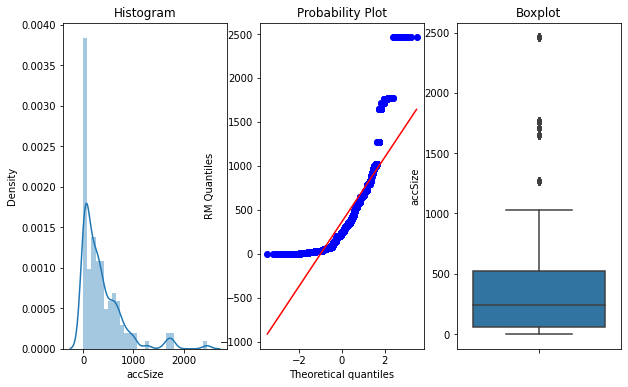

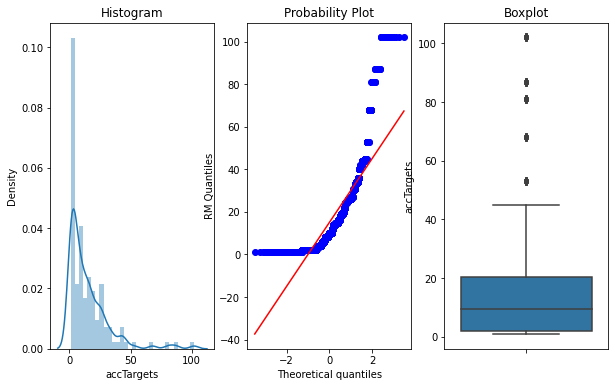

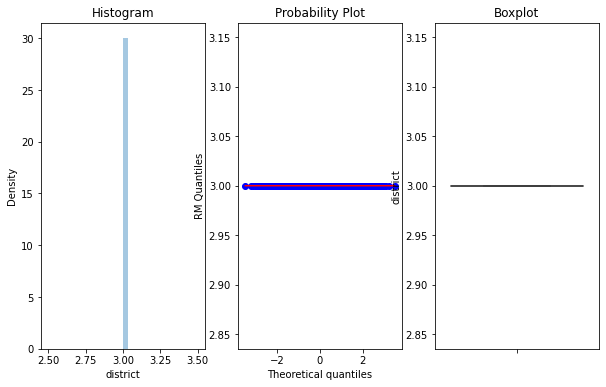

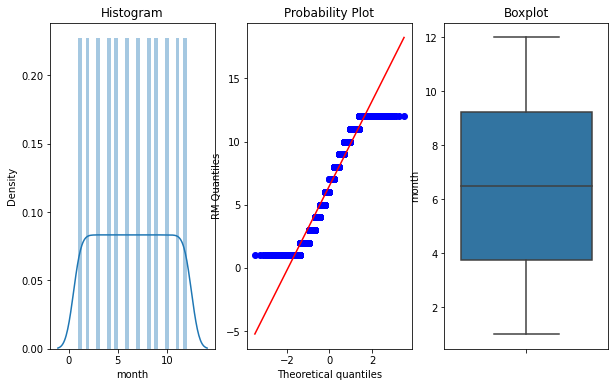

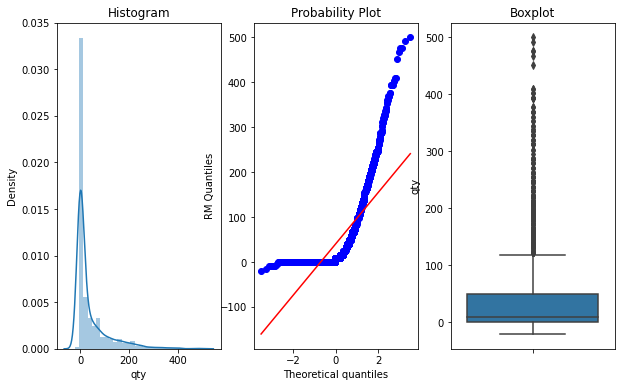

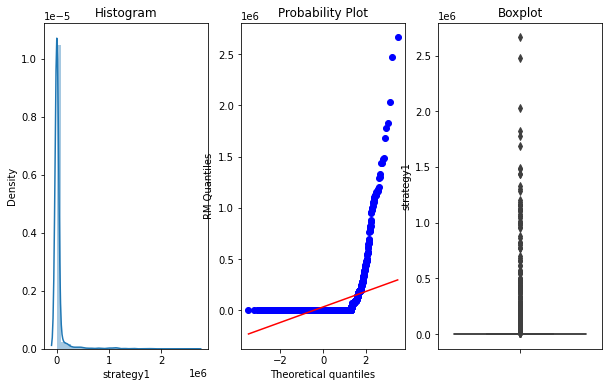

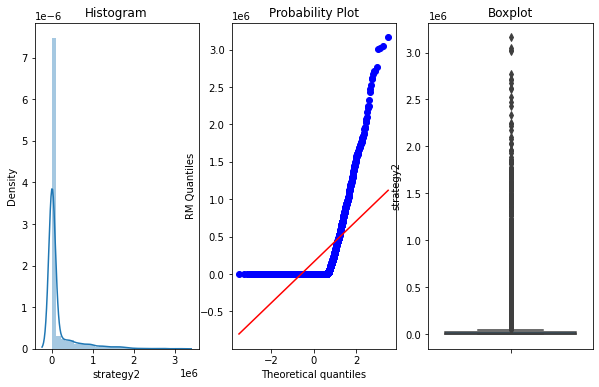

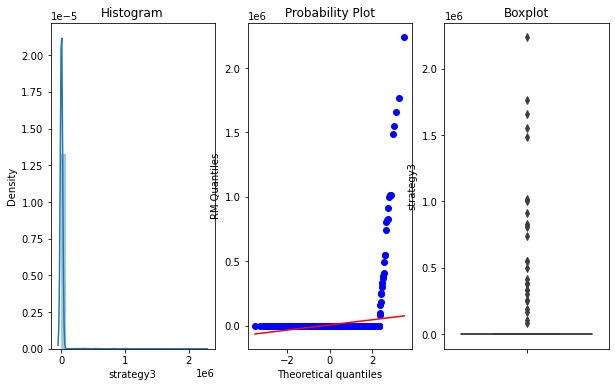

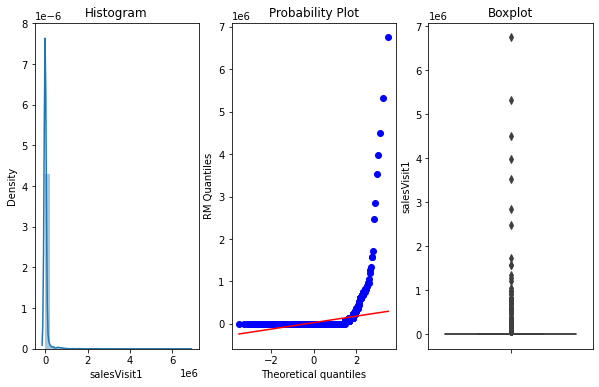

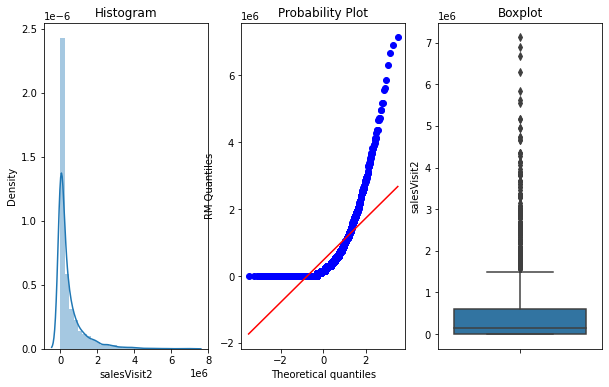

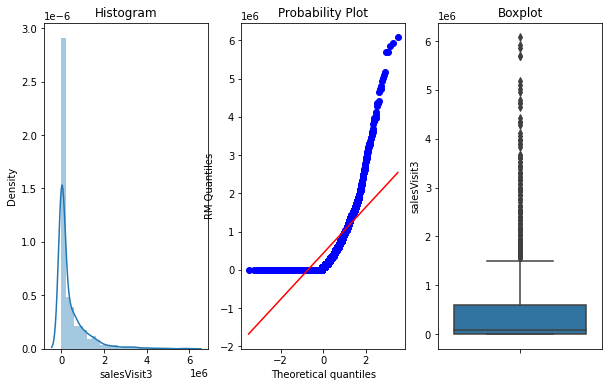

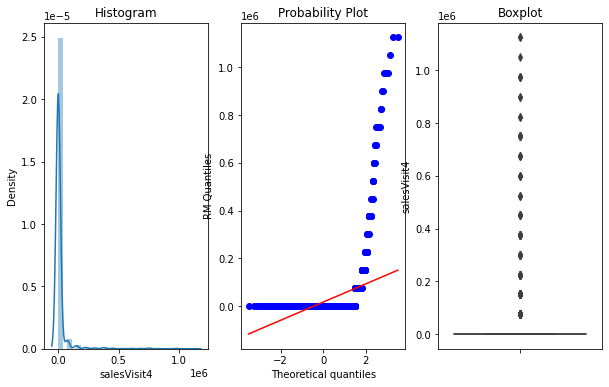

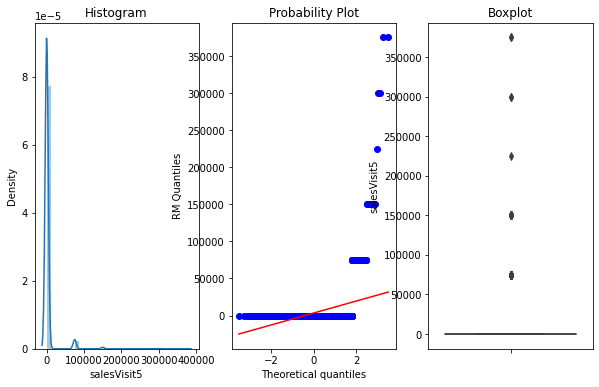

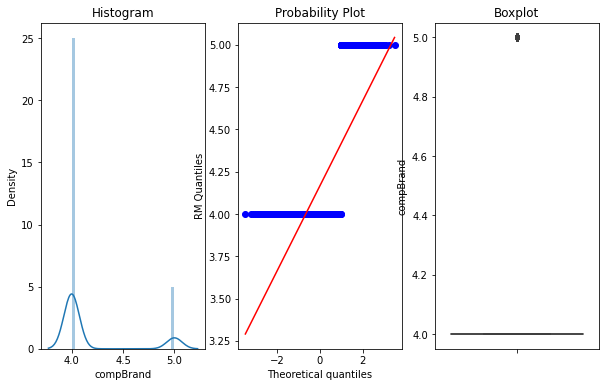

In [335]:
import seaborn as sns
def dig_plot(d,var):
    plt.figure(figsize=(10,6))
    
    #hist
    plt.subplot(1,3,1)
    sns.distplot(d[var],bins=30)
    plt.title("Histogram")
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(d[var],dist="norm",plot=plt)
    plt.ylabel("RM Quantiles")
    
    #box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=d[var])
    plt.title("Boxplot")
for var in continuous:
    dig_plot(df1,var)

Plotting individual featutres with respect to Sales for better information insights

We observe a sudden rise in sales from the year 2014

Text(0.5, 1.0, 'Sales Prediction by Year')

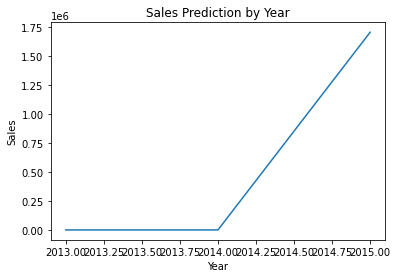

In [336]:
df1.groupby('year')['sales'].median().plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Sales Prediction by Year")

The middle months are having more rise in sales than the start and end months of the year

Text(0.5, 1.0, 'Sales Prediction by Month')

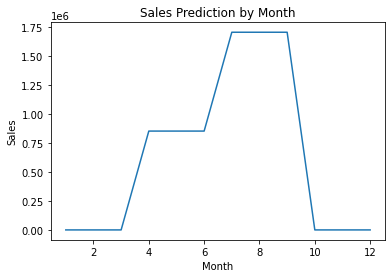

In [337]:
df1.groupby('month')['sales'].median().plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("Sales Prediction by Month")

In [338]:
df1['day'].nunique()

1

In [339]:
df1['month'].nunique()

12

In [340]:
df1['year'].nunique()

3

As the cardinality for feature 'day' is one we tend to drop the feature

In [341]:
df1.drop(['day'],axis=1,inplace=True)
df1.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand,year
0,XYZ-987002,Pharmacy,700,25,3,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013
1,XYZ-987002,Pharmacy,700,25,3,11,852365,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0,4,2013
2,XYZ-987002,Pharmacy,700,25,3,12,2557096,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2013
3,XYZ-987002,Pharmacy,700,25,3,1,4261826,41,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0,4,2014
4,XYZ-987002,Pharmacy,700,25,3,2,5966556,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2014


In [342]:
df1.shape

(2976, 18)

As the acc size increases the sales are increasing

Text(0.5, 1.0, 'Sales Prediction by accSize')

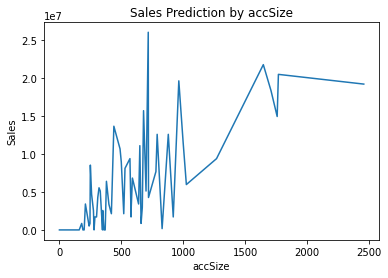

In [343]:
df1.groupby('accSize')['sales'].median().plot()
plt.xlabel('accSize')
plt.ylabel('Sales')
plt.title("Sales Prediction by accSize")

Adequate rise in the Sales as the accTargets increases

Text(0.5, 1.0, 'Sales Prediction by accTargets')

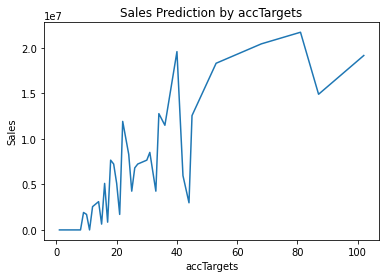

In [344]:
df1.groupby('accTargets')['sales'].median().plot()
plt.xlabel('accTargets')
plt.ylabel('Sales')
plt.title("Sales Prediction by accTargets")

Sales have been on the decreasing part at the end as per the Strategy1 

As there was only one district in the dataset there is nothing much we can use it to predict the Sales

Text(0.5, 1.0, 'Sales Prediction by district')

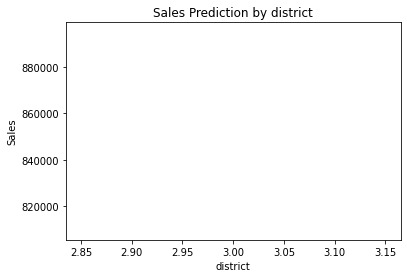

In [345]:
df1.groupby('district')['sales'].median().plot()
plt.xlabel('district')
plt.ylabel('Sales')
plt.title("Sales Prediction by district")

In [346]:
df1['district'].nunique()

1

The quantity had an uniform impact on Sales

Text(0.5, 1.0, 'Sales Prediction by Quantity')

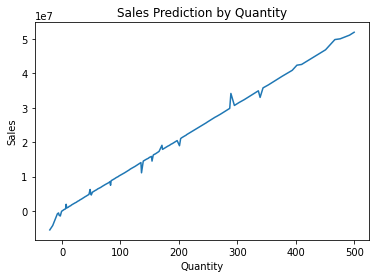

In [347]:
df1.groupby('qty')['sales'].median().plot()
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title("Sales Prediction by Quantity")

Text(0.5, 1.0, 'Sales Prediction by Strategy1')

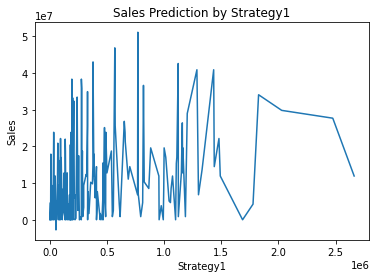

In [348]:
df1.groupby('strategy1')['sales'].median().plot()
plt.xlabel('Strategy1')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy1")

Sales have been on the increasing part at the end as per the Strategy2

Text(0.5, 1.0, 'Sales Prediction by Strategy2')

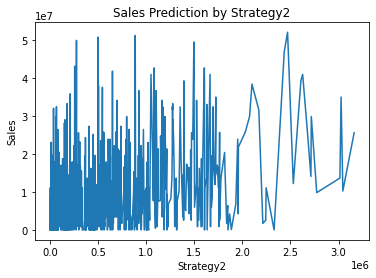

In [349]:
df1.groupby('strategy2')['sales'].median().plot()
plt.xlabel('Strategy2')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy2")

Sales have been on the decreasing part at the end as per the Strategy3

Text(0.5, 1.0, 'Sales Prediction by Strategy3')

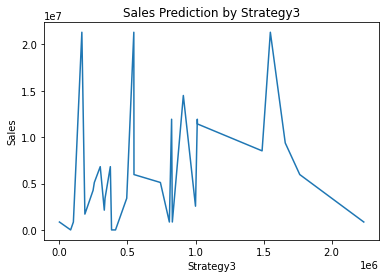

In [350]:
df1.groupby('strategy3')['sales'].median().plot()
plt.xlabel('Strategy3')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy3")

Sales have been on the increasing part at the end as per the salesVisit1

Text(0.5, 1.0, 'Sales impacted by salesVisit1')

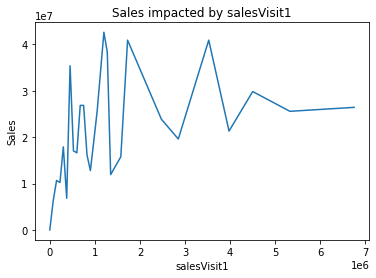

In [351]:
df1.groupby('salesVisit1')['sales'].median().plot()
plt.xlabel('salesVisit1')
plt.ylabel('Sales')
plt.title("Sales impacted by salesVisit1")

Sales have been on the increasing part at the end as per the salesVisit2

Text(0.5, 1.0, 'Sales impacted by salesVisit2')

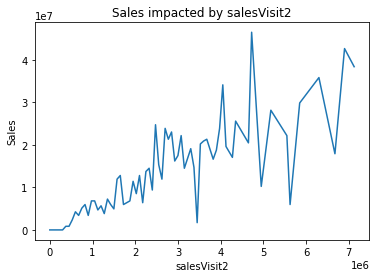

In [352]:
df1.groupby('salesVisit2')['sales'].median().plot()
plt.xlabel('salesVisit2')
plt.ylabel('Sales')
plt.title("Sales impacted by salesVisit2")

Sales have been on the decreasing part at the end as per the salesVisit3

Text(0.5, 1.0, 'Sales impacted by salesVisit3')

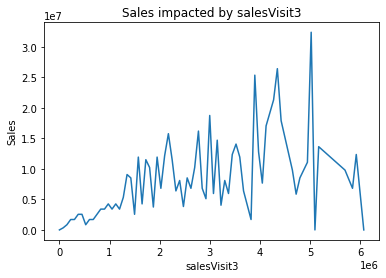

In [353]:
df1.groupby('salesVisit3')['sales'].median().plot()
plt.xlabel('salesVisit3')
plt.ylabel('Sales')
plt.title("Sales impacted by salesVisit3")

Sales have been on the decreasing part at the end as per the salesVisit4

Text(0.5, 1.0, 'Sales impacted by salesVisit4')

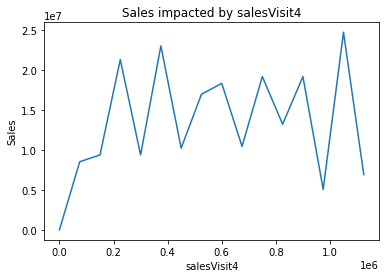

In [354]:
df1.groupby('salesVisit4')['sales'].median().plot()
plt.xlabel('salesVisit4')
plt.ylabel('Sales')
plt.title("Sales impacted by salesVisit4")

Sales have been on the increasing part at the end as per the salesVisit5 

Text(0.5, 1.0, 'Sales impacted by salesVisit5')

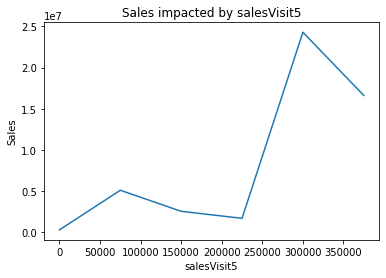

In [355]:
df1.groupby('salesVisit5')['sales'].median().plot()
plt.xlabel('salesVisit5')
plt.ylabel('Sales')
plt.title("Sales impacted by salesVisit5")

In [356]:
df1['compBrand'].unique()

array([4, 5], dtype=int64)

Uniform growth in sales when compared with the compBrand

Text(0.5, 1.0, 'Sales impacted by compBrand')

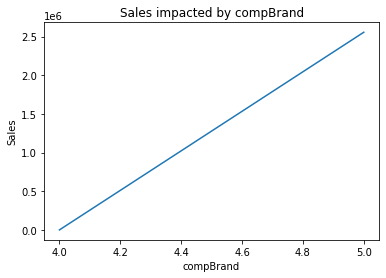

In [357]:
df1.groupby('compBrand')['sales'].median().plot()
plt.xlabel('compBrand')
plt.ylabel('Sales')
plt.title("Sales impacted by compBrand")

Plotting Heat map for the purpose of checking features if Multi-Collinearity exists and for better visual representation of data set

Index(['accID', 'accType', 'accSize', 'accTargets', 'district', 'month',
       'sales', 'qty', 'strategy1', 'strategy2', 'strategy3', 'salesVisit1',
       'salesVisit2', 'salesVisit3', 'salesVisit4', 'salesVisit5', 'compBrand',
       'year'],
      dtype='object')

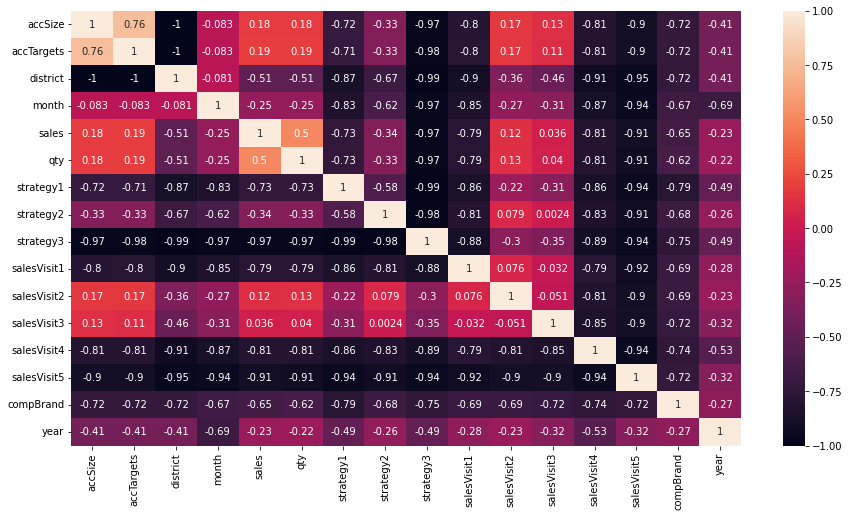

In [358]:
import seaborn as sns
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1.columns

In [359]:
df1['accType'].unique()

array(['Pharmacy', 'Hospital', 'Polyclinic', 'Private Clinic'],
      dtype=object)

Count plot inorder to understand which acctype has maostly been utilized

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Account Types')

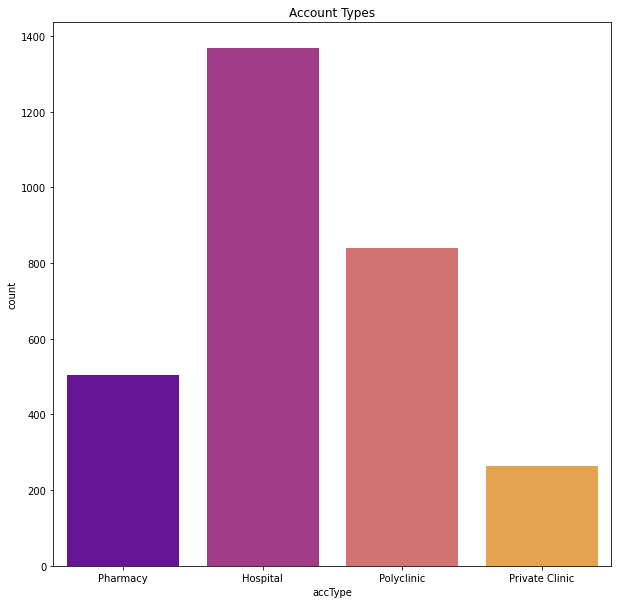

In [360]:
sns.countplot(df1['accType'], palette="plasma")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Account Types')

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Account ID')

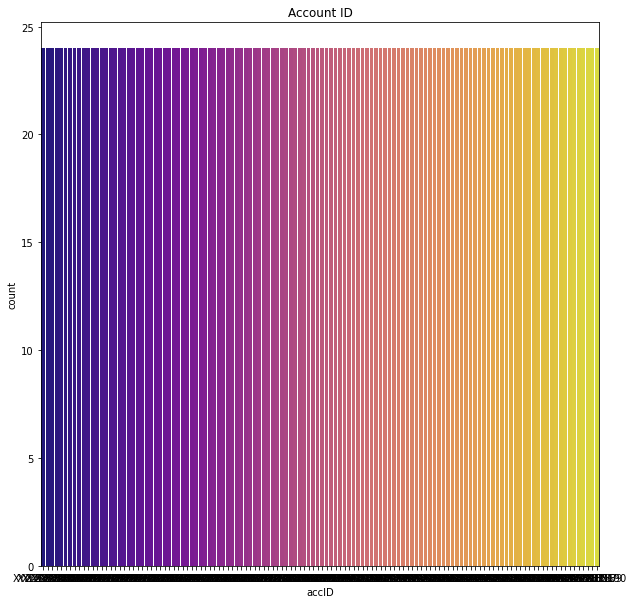

In [361]:
sns.countplot(df1['accID'], palette="plasma")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Account ID')

Pharmacy had more amount of sales than rest

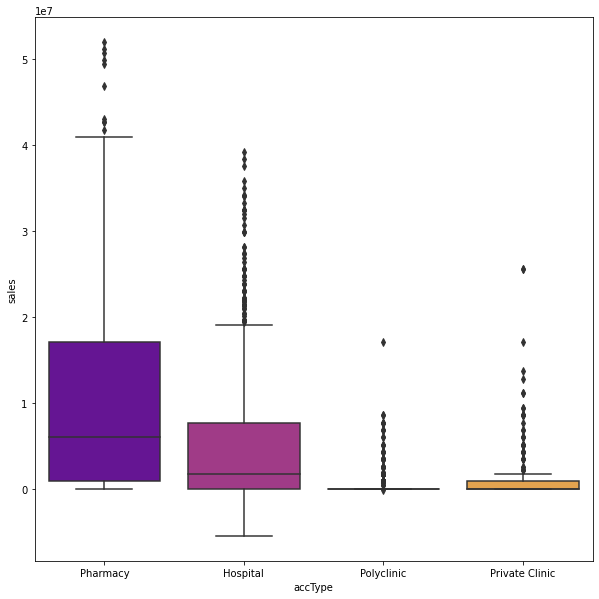

In [362]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df1, x='accType',y='sales',palette='plasma')

compBrand 5 had more amount of sales than compBrand 4

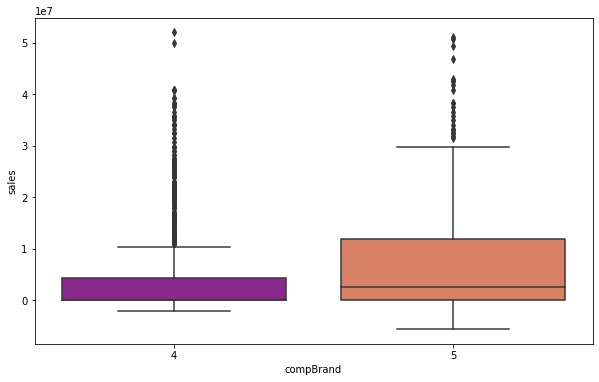

In [363]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df1, x='compBrand',y='sales',palette='plasma')

The sales have been more in the year 2015 then in 2013,2014

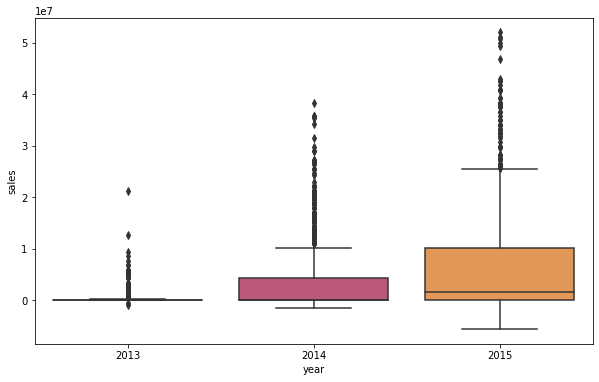

In [364]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df1, x='year',y='sales',palette='plasma')

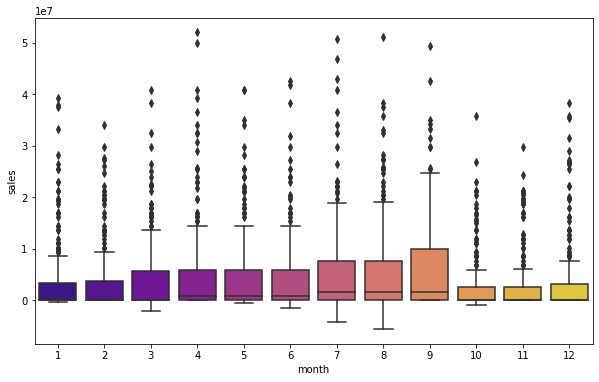

In [365]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df1, x='month',y='sales',palette='plasma')

Been evident that compBrand 5 was introduced into the market in 2015

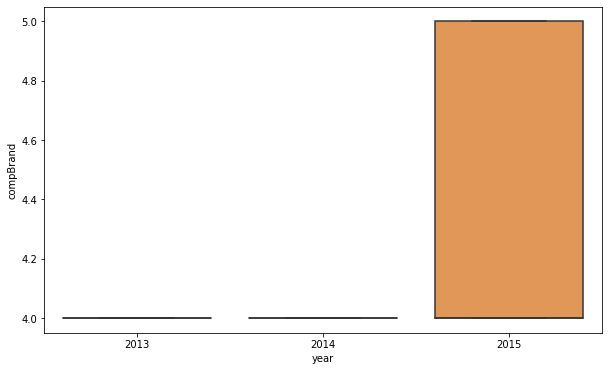

In [366]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df1, x='year',y='compBrand',palette='plasma')

In [367]:
df2=df1.copy()

Plotting the Sales individually for all 3 strategies for the year 2015

In [368]:
df2 = df1[df1.year == 2015][["year",'month',"sales",'strategy1','strategy2','strategy3','compBrand']]
df2.head()

,year,month,sales,strategy1,strategy2,strategy3,compBrand
15,2015,1,5966556,0.0,152712.0,0.0,4
16,2015,2,3409461,0.0,160000.0,0.0,4
17,2015,3,8523652,0.0,159600.0,0.0,4
18,2015,4,8523652,0.0,224500.0,0.0,4
19,2015,5,16194938,0.0,1553326.0,0.0,4


Text(0.5, 1.0, 'Sales Prediction by Strategy1')

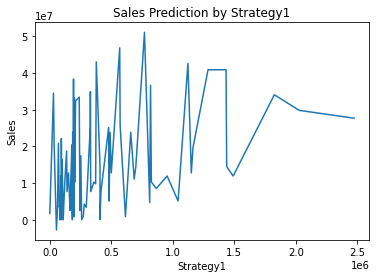

In [369]:
df2.groupby('strategy1')['sales'].median().plot()
plt.xlabel('Strategy1')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy1")

Text(0.5, 1.0, 'Sales Prediction by Strategy2')

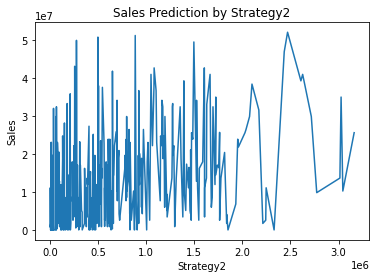

In [370]:
df2.groupby('strategy2')['sales'].median().plot()
plt.xlabel('Strategy2')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy2")

Text(0.5, 1.0, 'Sales Prediction by Strategy3')

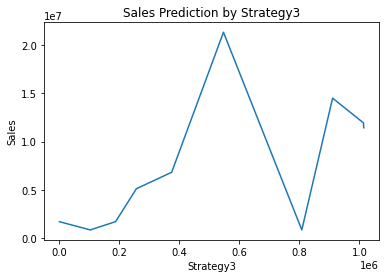

In [371]:
df2.groupby('strategy3')['sales'].median().plot()
plt.xlabel('Strategy3')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy3")

Text(0.5, 1.0, 'Sales Prediction by month')

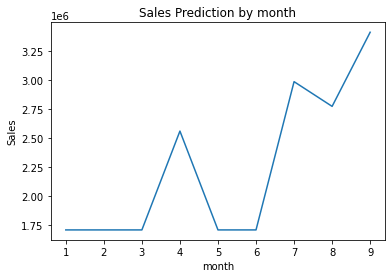

In [372]:
df2.groupby('month')['sales'].median().plot()
plt.xlabel('month')
plt.ylabel('Sales')
plt.title("Sales Prediction by month")

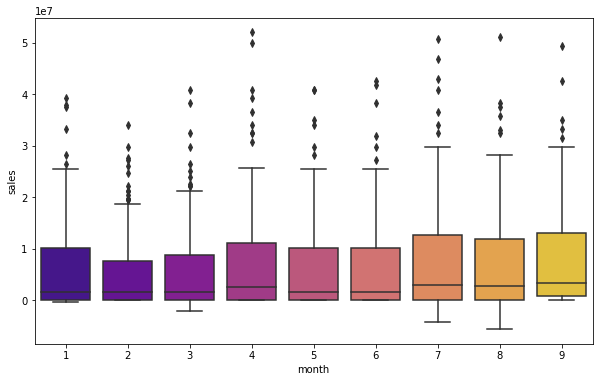

In [373]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df2, x='month',y='sales',palette='plasma')

In [374]:
df1['month'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [375]:
df2['month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Plotting the Sales individually for all 3 strategies for the years 2013,2014

In [376]:
df3=df1.copy()
df3 = df1[df1.year != 2015 ][["year",'qty','month',"sales",'strategy1','strategy2','strategy3','compBrand','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5']]
df3.head()

,year,qty,month,sales,strategy1,strategy2,strategy3,compBrand,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
0,2013,0,10,0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0
1,2013,8,11,852365,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,75000.0
2,2013,25,12,2557096,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0
3,2014,41,1,4261826,0.0,0.0,0.0,4,0.0,825000.0,300000.0,0.0,0.0
4,2014,57,2,5966556,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Sales Prediction by Strategy1')

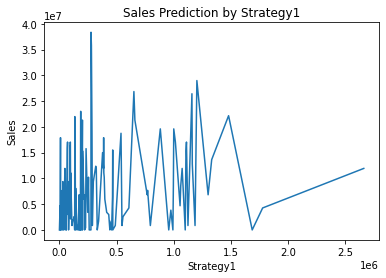

In [377]:
df3.groupby('strategy1')['sales'].median().plot()
plt.xlabel('Strategy1')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy1")

Text(0.5, 1.0, 'Sales Prediction by Strategy2')

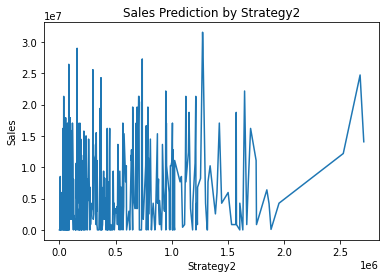

In [378]:
df3.groupby('strategy2')['sales'].median().plot()
plt.xlabel('Strategy2')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy2")

Text(0.5, 1.0, 'Sales Prediction by Strategy3')

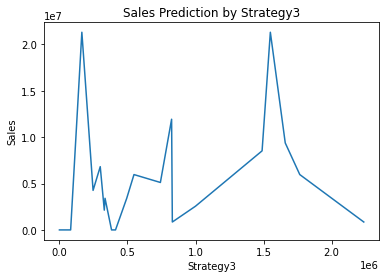

In [379]:
df3.groupby('strategy3')['sales'].median().plot()
plt.xlabel('Strategy3')
plt.ylabel('Sales')
plt.title("Sales Prediction by Strategy3")

Text(0.5, 1.0, 'Sales Prediction by month')

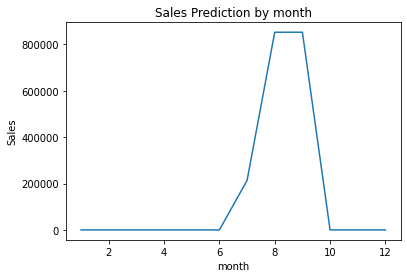

In [380]:
df3.groupby('month')['sales'].median().plot()
plt.xlabel('month')
plt.ylabel('Sales')
plt.title("Sales Prediction by month")

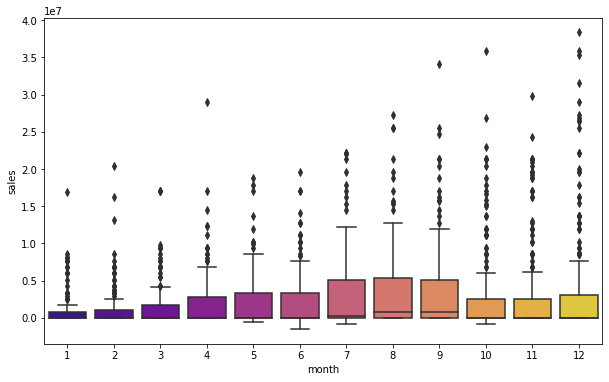

In [381]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df3, x='month',y='sales',palette='plasma')

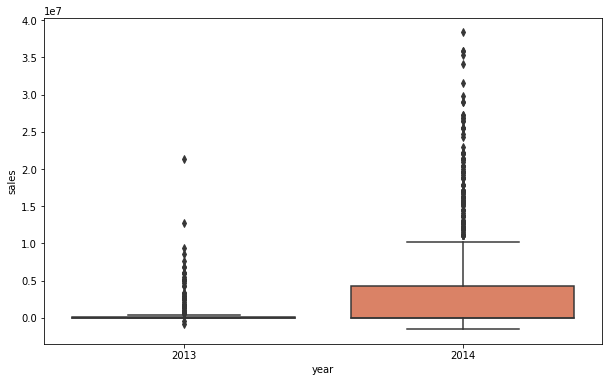

In [382]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df3, x='year',y='sales',palette='plasma')

Dropping of the compBrand feature as its cardinality is one

In [383]:
df3.drop(['compBrand'],axis=1,inplace=True)
df3.head()

,year,qty,month,sales,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
0,2013,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,8,11,852365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
2,2013,25,12,2557096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,41,1,4261826,0.0,0.0,0.0,0.0,825000.0,300000.0,0.0,0.0
4,2014,57,2,5966556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotting the Pairplot to get an over all visualised view of the data set

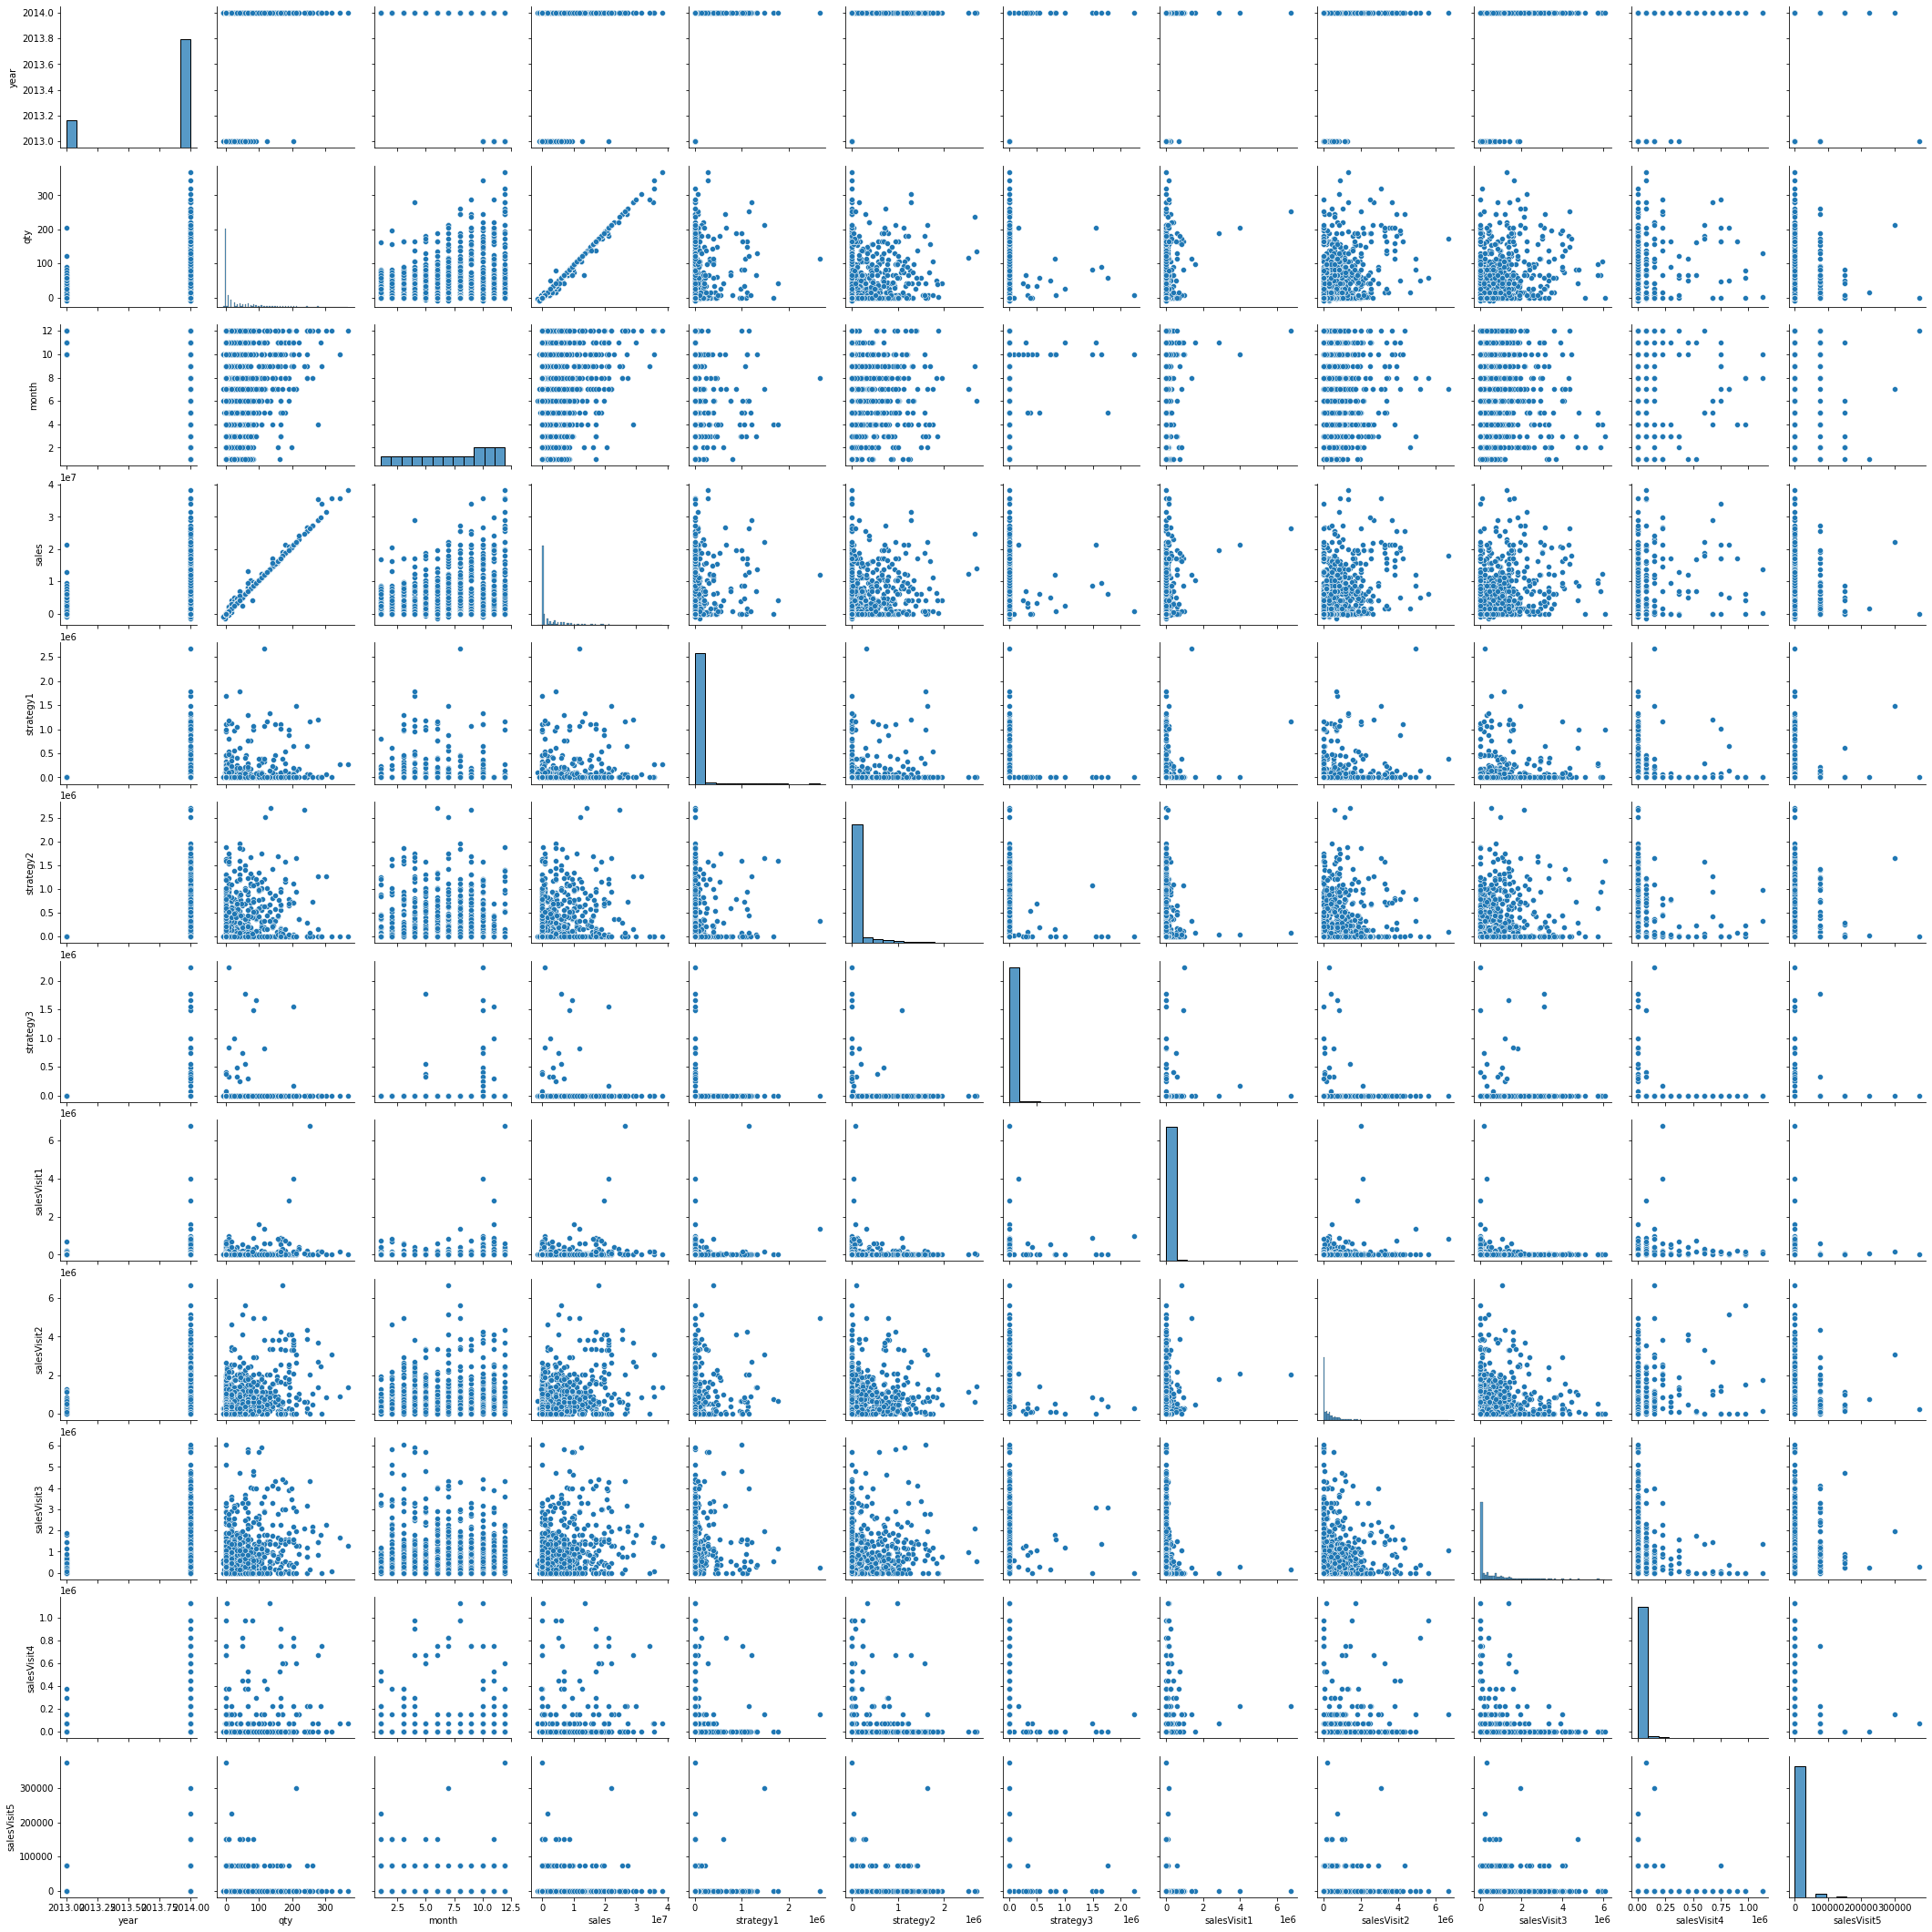

In [384]:
sns.pairplot(df3)

In [385]:
df3.shape

(1860, 12)

Index(['year', 'month', 'sales', 'strategy1', 'strategy2', 'strategy3',
       'compBrand'],
      dtype='object')

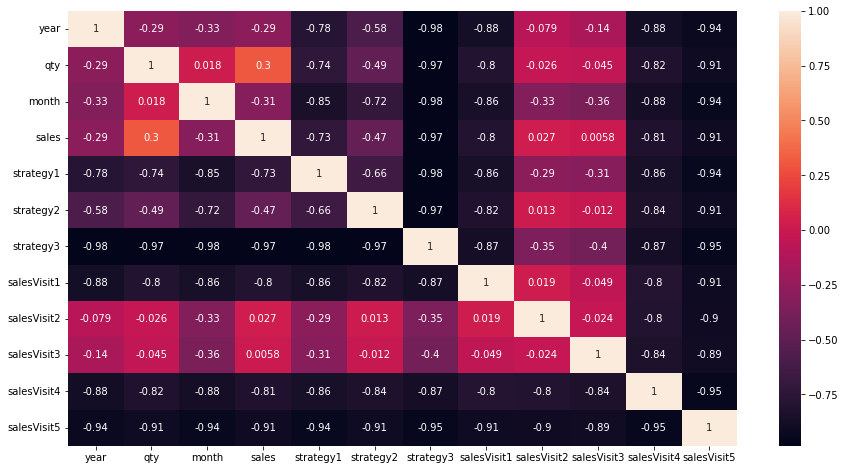

In [386]:
import seaborn as sns
corr = df3.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df2.columns

# Prediction of Sales for strategy1

As per the above Heat map few features such as year,month are ignored inorder to avoid high multi-collinearity

In [387]:
for_strategy1=df3[['year','qty','strategy1','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','sales']]

In [388]:
for_strategy1.head(5)

,year,qty,strategy1,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,sales
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0,852365
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0,2557096
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0,4261826
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0,5966556


Dependent feature Sales is stored in a variable

In [389]:
y=for_strategy1['sales']
y

0             0
1        852365
2       2557096
3       4261826
4       5966556
         ...   
2962          0
2963          0
2964          0
2965          0
2966          0
Name: sales, Length: 1860, dtype: int64

Removing the dependent feature so we can obtain all the essestial independent features

In [390]:
X=for_strategy1.copy()
X.drop(['sales'],axis=1,inplace=True)
X.head()

,year,qty,strategy1,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0


Built a Pipeline consisting of the machine learning model and standard scaler

StandardScaler is used inorder to scale all the features values present in data set in the range -3 to +3 to achieve better model accuracy

In [391]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [393]:
X_train.shape

(1488, 8)

In [394]:
y_test.shape

(372,)

In [395]:
X_test.shape

(372, 8)

In [396]:
y_train.shape

(1488,)

LinearRegression machine learning model

In [397]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [398]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [399]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [400]:
lr_pred=pipe.predict(X_test)

In [401]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
1953,5114191,5.187286e+06
754,1704730,1.694993e+06
2937,21309130,2.118937e+07
1910,0,7.373630e+03
80,0,8.453277e+04
...,...,...
1872,0,1.131233e+04
2627,0,3.765897e+03
2163,0,2.637131e+04
2165,255710,2.304378e+05


In [402]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.9969270607148973


In [403]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 450323.971917211


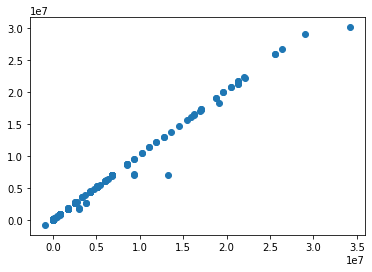

In [404]:
plt.scatter(y_test,lr_pred)

KFold Cross Valiadtion

In [405]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.9911926  0.99583294 0.99810427 0.99688523 0.99591855 0.99678481
 0.9969405  0.99953964 0.99489482 0.99107933]
Mean of all scores:  0.9957172696434793


Plotting the learning curves

<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

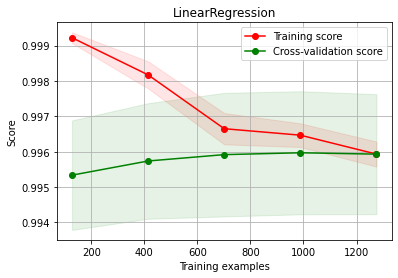

In [406]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

Lasso machine learning model

In [407]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [408]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [409]:
lasso_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
1953,5114191,5.187287e+06
754,1704730,1.694992e+06
2937,21309130,2.118939e+07
1910,0,7.374749e+03
80,0,8.453193e+04
...,...,...
1872,0,1.131063e+04
2627,0,3.768149e+03
2163,0,2.636846e+04
2165,255710,2.304348e+05


In [410]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.9969270674437668


In [411]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 450323.4796344687


In [412]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99119261 0.99583296 0.99810428 0.99688525 0.99591858 0.99678481
 0.9969405  0.99953964 0.99489482 0.99107932]
Mean of all scores:  0.9957172783217223


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

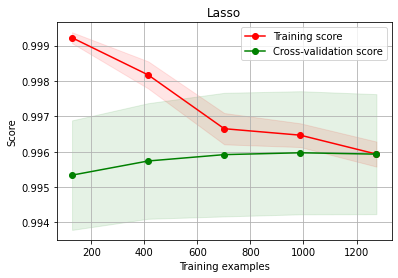

In [413]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

XGboost machine learning model

In [414]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [415]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [416]:
xgb_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
1953,5114191,5.162681e+06
754,1704730,1.782373e+06
2937,21309130,2.061012e+07
1910,0,-3.723276e+03
80,0,-7.631399e+03
...,...,...
1872,0,-2.520861e+02
2627,0,1.385335e+03
2163,0,-2.632923e+04
2165,255710,1.963783e+05


In [417]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.9966912439935376


In [418]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 467255.9102059688


In [419]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.9913721  0.99532204 0.99731872 0.99583689 0.98593652 0.99567849
 0.99370189 0.99503107 0.98207618 0.98623305]
Mean of all scores:  0.991850694624041


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

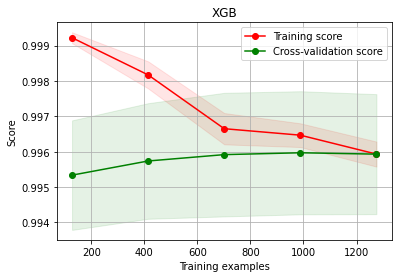

In [420]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

Support Vector Regressor machine learning model

In [421]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [422]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [423]:
svr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
1953,5114191,135.373277
754,1704730,115.014040
2937,21309130,168.789231
1910,0,20.633342
80,0,157.263570
...,...,...
1872,0,0.100001
2627,0,0.100000
2163,0,146.931572
2165,255710,168.946743


In [424]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 6438381.288385727


In [425]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.30957604 -0.31798854 -0.2624284  -0.29089367 -0.23478948 -0.26388343
 -0.30843297 -0.19813699 -0.22956586 -0.21639892]
Mean of all scores:  -0.26320943028084515


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

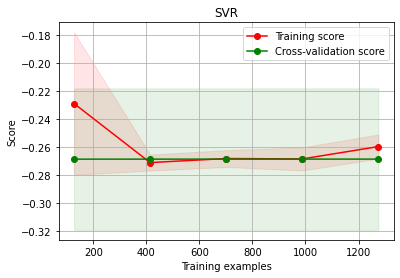

In [426]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

Decision Tree Regressor machine learning model

In [427]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [428]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [429]:
dtr_pred=pipe.predict(X_test)

In [430]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
1953,5114191,5114191.0
754,1704730,1704730.0
2937,21309130,21309130.0
1910,0,0.0
80,0,0.0
...,...,...
1872,0,0.0
2627,0,0.0
2163,0,0.0
2165,255710,255710.0


In [431]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.9970399232077405


In [432]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 441989.38348569523


In [433]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.98535903 0.99064803 0.99666119 0.99534887 0.98179331 0.99168226
 0.99223256 0.99414083 0.97807367 0.98787162]
Mean of all scores:  0.9893811377305365


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

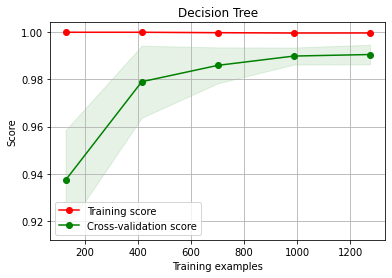

In [434]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

Random Forest Regressor machine learning model

In [435]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [436]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [437]:
rfr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
1953,5114191,5114191.00
754,1704730,1730300.96
2937,21309130,21330439.09
1910,0,0.00
80,0,0.00
...,...,...
1872,0,0.00
2627,0,0.00
2163,0,0.00
2165,255710,246333.93


In [438]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.9968990960591506


In [439]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 452365.20445295016


In [440]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99156305 0.99431492 0.99767887 0.99652241 0.98895654 0.99521399
 0.99283813 0.99874011 0.98744025 0.98960727]
Mean of all scores:  0.9932875543176662


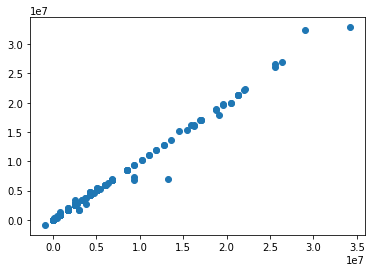

In [441]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

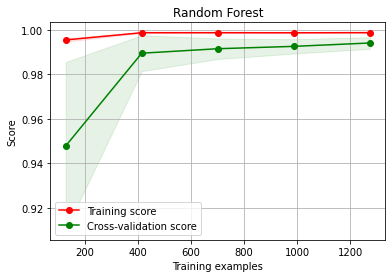

In [442]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

Perform the machine learning model hyper parameter tuning by GridSearchCv for better model accuracy score

Hyper parameter tuning for Random Forest Regressor

In [443]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [444]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 8}


In [445]:
print(search.best_score_)

-151780634805.85593


In [446]:
rfr_search=search.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})
result

,original test set,predictions
1953,5114191,5.092882e+06
754,1704730,1.758003e+06
2937,21309130,2.141568e+07
1910,0,0.000000e+00
80,0,0.000000e+00
...,...,...
1872,0,5.490975e+02
2627,0,0.000000e+00
2163,0,0.000000e+00
2165,255710,2.396582e+05


In [447]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.9966600924976021


In [448]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 469446.67116099026


Hyper parameter tuning for Lasso

In [449]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+13, tolerance: 3.638e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.511e+13, tolerance: 3.680e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.770e+13, tolerance: 3.540e+12
  mod

{'alpha': 700}
-116696042256.96072


In [450]:
lass_modelpred=lasso_model.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})
result

,original test set,predictions
1953,5114191,5.188117e+06
754,1704730,1.695590e+06
2937,21309130,2.119058e+07
1910,0,8.485410e+03
80,0,8.474436e+04
...,...,...
1872,0,7.959309e+03
2627,0,5.176288e+03
2163,0,2.654616e+04
2165,255710,2.304827e+05


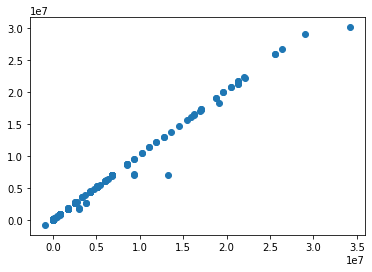

In [451]:
plt.scatter(y_test,lass_modelpred)

In [452]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.9969277441592337


In [453]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 450273.96850064554


In [454]:
lasso_model.best_params_

{'alpha': 700}

In [455]:
lasso_model.best_score_

-116696042256.96072

Hyper parameter tuning for XGBoostRegressor

In [456]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[10:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [457]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-339468734152.6032
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [458]:
xgb_gridpred=xgb_grid.predict(X_test)

In [459]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
1953,5114191,5.161568e+06
754,1704730,1.726021e+06
2937,21309130,2.141710e+07
1910,0,4.647682e+04
80,0,9.078183e+04
...,...,...
1872,0,-3.502598e+03
2627,0,2.743824e+03
2163,0,-7.532620e+04
2165,255710,1.163260e+04


In [460]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.9964458330879385


In [461]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 484244.4487676254


Out of all regression machine learning algorithms Lasso Regressor with GridSearchCV had best r2 score for strategy1 so we consider it as best performed algorithm and stored it in a data frame named "result"

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales obtained for strategy1

In [462]:
mean_of_sales_strategy1=result['predictions'].mean()
mean_of_sales_strategy1

2886293.756177943

Calculating the individual percentages for the original and predicted predictions for Srategy1

In [463]:
result['Percentage_of_sales_strategy1']=(result['predictions']/result['predictions'].sum())*100
result

,original test set,predictions,Percentage_of_sales_strategy1
1953,5114191,5.188117e+06,0.483199
754,1704730,1.695590e+06,0.157920
2937,21309130,2.119058e+07,1.973601
1910,0,8.485410e+03,0.000790
80,0,8.474436e+04,0.007893
...,...,...,...
1872,0,7.959309e+03,0.000741
2627,0,5.176288e+03,0.000482
2163,0,2.654616e+04,0.002472
2165,255710,2.304827e+05,0.021466


Calculating the average/mean value of all the final percenatge prediction of sales for Strategy1

In [464]:
Percentage_of_sales_strategy1=result['Percentage_of_sales_strategy1'].mean()
Percentage_of_sales_strategy1

0.26881720430107536

# Prediction of Sales for strategy2

In [465]:
for_strategy2=df3[['year','qty','strategy2','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','sales']]

In [466]:
for_strategy2.head(5)

,year,qty,strategy2,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,sales
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0,852365
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0,2557096
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0,4261826
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0,5966556


In [467]:
y=for_strategy2['sales']
y

0             0
1        852365
2       2557096
3       4261826
4       5966556
         ...   
2962          0
2963          0
2964          0
2965          0
2966          0
Name: sales, Length: 1860, dtype: int64

In [468]:
X=for_strategy2.copy()
X.drop(['sales'],axis=1,inplace=True)
X.head()

,year,qty,strategy2,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0


In [469]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [471]:
X_train.shape

(1488, 8)

In [472]:
y_test.shape

(372,)

In [473]:
X_test.shape

(372, 8)

In [474]:
y_train.shape

(1488,)

In [475]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [476]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [477]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [478]:
lr_pred=pipe.predict(X_test)

In [479]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
1953,5114191,5.189000e+06
754,1704730,1.691054e+06
2937,21309130,2.122211e+07
1910,0,5.971654e+03
80,0,8.190864e+04
...,...,...
1872,0,1.171708e+04
2627,0,3.699970e+03
2163,0,2.254457e+04
2165,255710,2.249234e+05


In [480]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.996929203223696


In [481]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 450167.19903139956


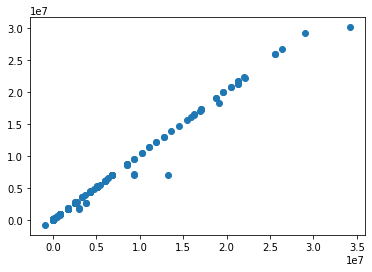

In [482]:
plt.scatter(y_test,lr_pred)

In [483]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99124347 0.99582623 0.99809882 0.99688289 0.99590933 0.99676434
 0.9969318  0.99953145 0.99489777 0.99099838]
Mean of all scores:  0.9957084481156923


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

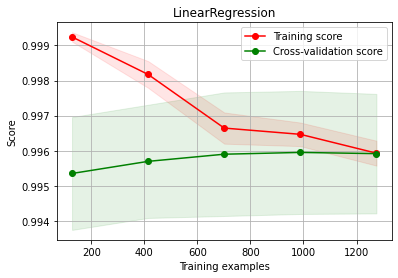

In [484]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [485]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [486]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [487]:
lasso_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
1953,5114191,5.189001e+06
754,1704730,1.691054e+06
2937,21309130,2.122213e+07
1910,0,5.972972e+03
80,0,8.190781e+04
...,...,...
1872,0,1.171508e+04
2627,0,3.702293e+03
2163,0,2.254150e+04
2165,255710,2.249208e+05


In [488]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.9969292103450789


In [489]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 450166.67784988467


In [490]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99124347 0.99582625 0.99809883 0.99688291 0.99590936 0.99676435
 0.99693181 0.99953146 0.99489778 0.99099838]
Mean of all scores:  0.9957084583676888


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

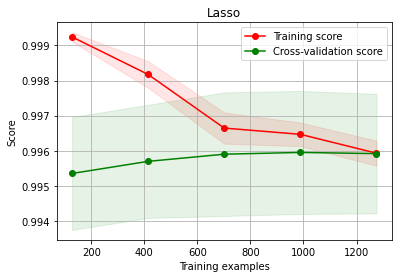

In [491]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [492]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [493]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [494]:
xgb_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
1953,5114191,5.081888e+06
754,1704730,1.721013e+06
2937,21309130,2.073023e+07
1910,0,1.649000e+03
80,0,2.507693e+03
...,...,...
1872,0,-2.806195e+02
2627,0,2.274287e+02
2163,0,1.093434e+05
2165,255710,1.980877e+05


In [495]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.9965124739023367


In [496]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 479691.1679858712


In [497]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99029191 0.99582463 0.99682592 0.9958944  0.98607637 0.99576273
 0.99376868 0.99703067 0.9822005  0.98564005]
Mean of all scores:  0.9919315861005922


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

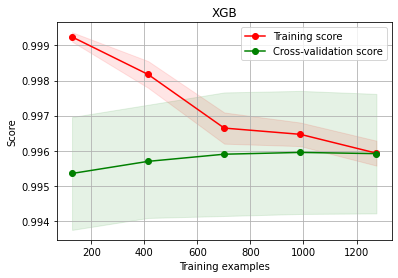

In [498]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [499]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [500]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [501]:
svr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
1953,5114191,124.982209
754,1704730,110.470250
2937,21309130,180.345589
1910,0,18.414668
80,0,155.269509
...,...,...
1872,0,0.100001
2627,0,0.100000
2163,0,160.919744
2165,255710,171.984840


In [502]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 6438379.623531834


In [503]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.30957557 -0.31798784 -0.26242781 -0.29089244 -0.2347881  -0.26388306
 -0.30843251 -0.19813598 -0.22956558 -0.21639853]
Mean of all scores:  -0.26320874252669035


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

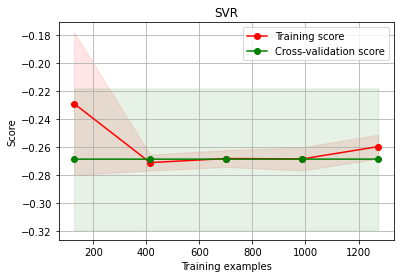

In [504]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [505]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [506]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [507]:
dtr_pred=pipe.predict(X_test)

In [508]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
1953,5114191,5114191.0
754,1704730,1704730.0
2937,21309130,21309130.0
1910,0,0.0
80,0,0.0
...,...,...
1872,0,0.0
2627,0,0.0
2163,0,0.0
2165,255710,255710.0


In [509]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.9967425566538558


In [510]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 463624.5747169696


In [511]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.98715733 0.99261583 0.99596755 0.9929588  0.9824078  0.99248715
 0.99253929 0.99542402 0.97643241 0.98527029]
Mean of all scores:  0.9893260458518742


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

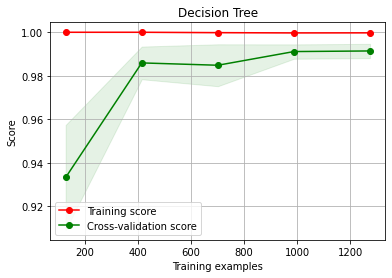

In [512]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [513]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [514]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [515]:
rfr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
1953,5114191,5097143.70
754,1704730,1704730.00
2937,21309130,21330439.10
1910,0,0.00
80,0,0.00
...,...,...
1872,0,0.00
2627,0,0.00
2163,0,0.00
2165,255710,219910.44


In [516]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.9970444952117377


In [517]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 441648.4184823397


In [518]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99167136 0.99481778 0.99761187 0.99659375 0.98668141 0.99438532
 0.9933793  0.9989265  0.98689581 0.98934554]
Mean of all scores:  0.9930308649054946


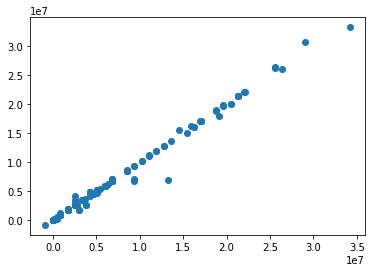

In [519]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

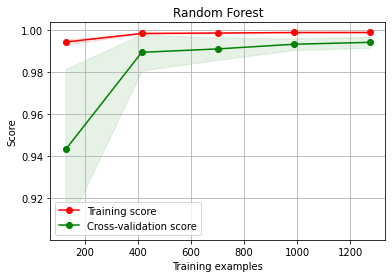

In [520]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [521]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [522]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [523]:
print(search.best_score_)

-144122699669.1802


In [524]:
rfr_search=search.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})
result

,original test set,predictions
1953,5114191,5.114191e+06
754,1704730,1.704730e+06
2937,21309130,2.127899e+07
1910,0,0.000000e+00
80,0,0.000000e+00
...,...,...
1872,0,3.417794e+02
2627,0,0.000000e+00
2163,0,0.000000e+00
2165,255710,2.342687e+05


In [525]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.9967249744745441


In [526]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 464872.0601637783


In [527]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]}
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.646e+13, tolerance: 3.638e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.515e+13, tolerance: 3.680e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.774e+13, tolerance: 3.540e+12
  mod

{'alpha': 700}
-116997365040.82437


In [528]:
lass_modelpred=lasso_model.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})

,original test set,predictions
1953,5114191,5.189910e+06
754,1704730,1.691707e+06
2937,21309130,2.122349e+07
1910,0,7.112075e+03
80,0,8.222175e+04
...,...,...
1872,0,8.357918e+03
2627,0,5.125898e+03
2163,0,2.262317e+04
2165,255710,2.249828e+05


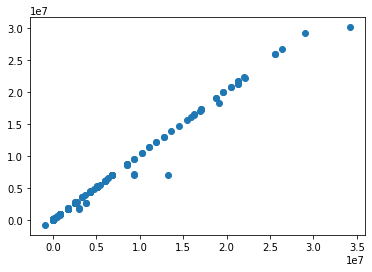

In [529]:
plt.scatter(y_test,lass_modelpred)

In [530]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.9969300926116454


In [531]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 450102.10408755264


In [532]:
lasso_model.best_params_

{'alpha': 700}

In [533]:
lasso_model.best_score_

-116997365040.82437

In [534]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[10:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [535]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-310157144233.74963
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [536]:
xgb_gridpred=xgb_grid.predict(X_test)

In [537]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
1953,5114191,5.018837e+06
754,1704730,1.670157e+06
2937,21309130,2.099142e+07
1910,0,4.333200e+04
80,0,-8.023116e+04
...,...,...
1872,0,-1.262803e+03
2627,0,2.712199e+03
2163,0,2.240318e+05
2165,255710,-1.671145e+04


In [538]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.9960127725312209


In [539]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 512842.6546841111


Out of all regression machine learning algorithms Random Forest Regressor with GridSearchCV had best r2 score for strategy2 so we consider it as best performed algorithm and stored it in a data frame named "result"

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales obtained for strategy2

In [540]:
mean_of_sales_strategy2=result['predictions'].mean()
mean_of_sales_strategy2

2876899.156203307

Calculating the individual percentages for the original and predicted predictions for Srategy2

In [541]:
result['Percentage_of_sales_strategy2']=(result['predictions']/result['predictions'].sum())*100
result

,original test set,predictions,Percentage_of_sales_strategy2
1953,5114191,5.114191e+06,0.477870
754,1704730,1.704730e+06,0.159290
2937,21309130,2.127899e+07,1.988307
1910,0,0.000000e+00,0.000000
80,0,0.000000e+00,0.000000
...,...,...,...
1872,0,3.417794e+02,0.000032
2627,0,0.000000e+00,0.000000
2163,0,0.000000e+00,0.000000
2165,255710,2.342687e+05,0.021890


Calculating the average/mean value of all the final percentage prediction of sales for Strategy2

In [542]:
Percentage_of_sales_strategy2=result['Percentage_of_sales_strategy2'].mean()
Percentage_of_sales_strategy2

0.26881720430107525

# Prediction of Sales for strategy3

In [543]:
for_strategy3=df3[['year','qty','strategy3','salesVisit1','salesVisit2','salesVisit3','salesVisit4','salesVisit5','sales']]

In [544]:
for_strategy3.head(5)

,year,qty,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,sales
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0,852365
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0,2557096
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0,4261826
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0,5966556


In [545]:
y=for_strategy3['sales']
y

0             0
1        852365
2       2557096
3       4261826
4       5966556
         ...   
2962          0
2963          0
2964          0
2965          0
2966          0
Name: sales, Length: 1860, dtype: int64

In [546]:
X=for_strategy3.copy()
X.drop(['sales'],axis=1,inplace=True)
X.head()

,year,qty,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5
0,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,8,0.0,0.0,0.0,0.0,0.0,75000.0
2,2013,25,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,41,0.0,0.0,825000.0,300000.0,0.0,0.0
4,2014,57,0.0,0.0,0.0,0.0,0.0,0.0


In [547]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [549]:
X_train.shape

(1488, 8)

In [550]:
y_test.shape

(372,)

In [551]:
X_test.shape

(372, 8)

In [552]:
y_train.shape

(1488,)

In [553]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [554]:
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [555]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [556]:
lr_pred=pipe.predict(X_test)

In [557]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
1953,5114191,5.191036e+06
754,1704730,1.691302e+06
2937,21309130,2.122358e+07
1910,0,6.269354e+03
80,0,8.499522e+04
...,...,...
1872,0,1.154073e+04
2627,0,4.098673e+03
2163,0,2.136386e+04
2165,255710,2.241858e+05


In [558]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.9969326646367164


In [559]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

RMSE: 449913.8023946397


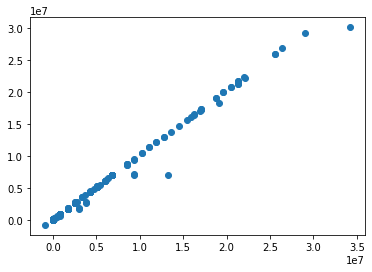

In [560]:
plt.scatter(y_test,lr_pred)

In [561]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99124252 0.9958314  0.99809537 0.99688184 0.99592623 0.99677754
 0.99691632 0.99952765 0.99491676 0.99107262]
Mean of all scores:  0.9957188246509574


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

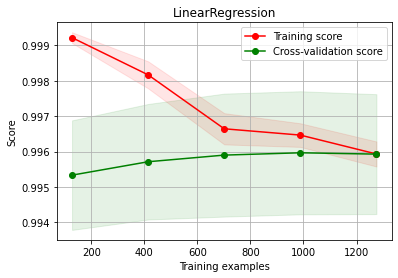

In [562]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [563]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [564]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [565]:
lasso_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
1953,5114191,5.191036e+06
754,1704730,1.691302e+06
2937,21309130,2.122359e+07
1910,0,6.270392e+03
80,0,8.499404e+04
...,...,...
1872,0,1.154024e+04
2627,0,4.100135e+03
2163,0,2.136278e+04
2165,255710,2.241853e+05


In [566]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: 0.9969326697372084


In [567]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 449913.42890142725


In [568]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99124253 0.99583142 0.99809538 0.99688185 0.99592625 0.99677754
 0.99691633 0.99952766 0.99491676 0.99107261]
Mean of all scores:  0.9957188332105682


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

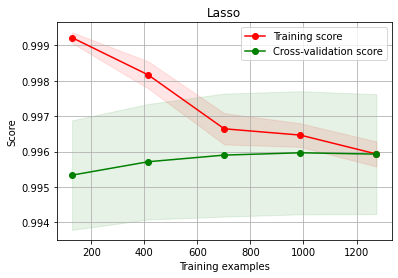

In [569]:
skplt.estimators.plot_learning_curve(lass,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [570]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [571]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [572]:
xgb_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
1953,5114191,5.042137e+06
754,1704730,1.902168e+06
2937,21309130,2.083942e+07
1910,0,-3.648822e+02
80,0,1.010311e+04
...,...,...
1872,0,-2.172294e+02
2627,0,1.950580e+02
2163,0,-3.049965e+04
2165,255710,2.123566e+05


In [573]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.9962926208813955


In [574]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 494552.6983360414


In [575]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.98993894 0.9956891  0.99686281 0.99538284 0.98613033 0.99565475
 0.99346173 0.99567848 0.9817647  0.9845425 ]
Mean of all scores:  0.9915106186610825


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

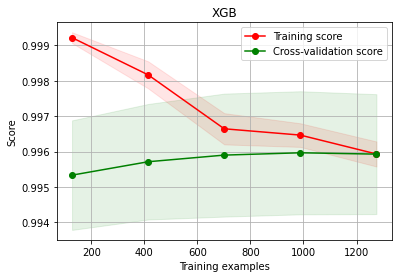

In [576]:
skplt.estimators.plot_learning_curve(xg,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [577]:
from sklearn.svm import SVR
sv=SVR()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [578]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [579]:
svr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
1953,5114191,134.517155
754,1704730,115.208299
2937,21309130,168.437141
1910,0,20.824620
80,0,156.705369
...,...,...
1872,0,0.100001
2627,0,0.100000
2163,0,145.846845
2165,255710,167.239211


In [580]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 6438381.584504896


In [581]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.30957595 -0.31798805 -0.26242754 -0.29089286 -0.23478908 -0.26388311
 -0.30843222 -0.19813597 -0.22956572 -0.21639867]
Mean of all scores:  -0.26320891729713003


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

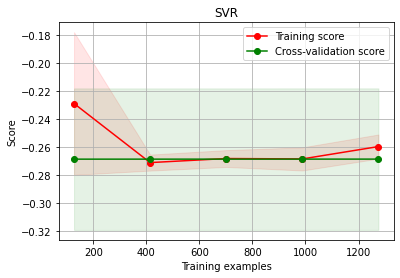

In [582]:
skplt.estimators.plot_learning_curve(sv,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [583]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [584]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [585]:
dtr_pred=pipe.predict(X_test)

In [586]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
1953,5114191,5114191.0
754,1704730,1704730.0
2937,21309130,21309130.0
1910,0,0.0
80,0,0.0
...,...,...
1872,0,0.0
2627,0,0.0
2163,0,0.0
2165,255710,255710.0


In [587]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: 0.9967959174248958


In [588]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 459817.6794772325


In [589]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.9876776  0.99072336 0.99737146 0.9953958  0.98175833 0.99163609
 0.99231233 0.9937065  0.97828715 0.98631519]
Mean of all scores:  0.9895183812639978


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

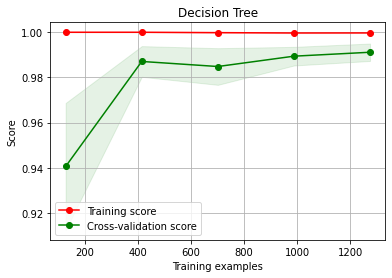

In [590]:
skplt.estimators.plot_learning_curve(dtr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [591]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
pipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [592]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [593]:
rfr_pred=pipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
1953,5114191,5114191.00
754,1704730,1743086.44
2937,21309130,21223893.44
1910,0,0.00
80,0,0.00
...,...,...
1872,0,0.00
2627,0,0.00
2163,0,1704.73
2165,255710,248464.85


In [594]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.9969173123774066


In [595]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 451036.5906120837


In [596]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(pipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.99133876 0.99430743 0.99809845 0.99644531 0.98839683 0.99501948
 0.99297451 0.99854321 0.98746844 0.99059212]
Mean of all scores:  0.9933184556459981


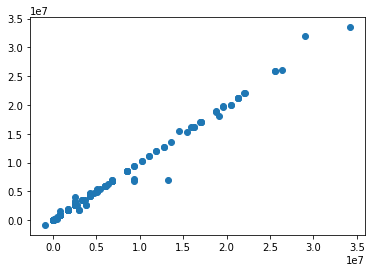

In [597]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

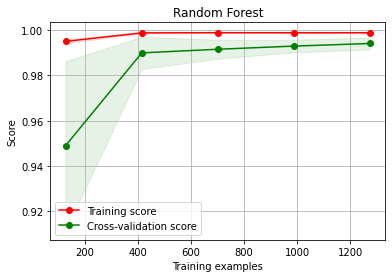

In [598]:
skplt.estimators.plot_learning_curve(rfr,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

Utlizing GridSearchCV to perform hyper parameter tuning

In [599]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [600]:
print(search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 12}


In [601]:
print(search.best_score_)

-142249337856.20016


In [602]:
rfr_search=search.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

,original test set,predictions
1953,5114191,5.034366e+06
754,1704730,1.841223e+06
2937,21309130,2.148735e+07
1910,0,1.391014e+02
80,0,1.391014e+02
...,...,...
1872,0,1.391014e+02
2627,0,1.391014e+02
2163,0,1.391014e+02
2165,255710,2.810685e+05


In [603]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.9965409861109449


In [604]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 477729.70160596614


Hyper parameter tuning for Lasso regressor

In [605]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.646e+13, tolerance: 3.638e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.513e+13, tolerance: 3.680e+12
  model = cd_fast.enet_coordinate_descent(
c:\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.771e+13, tolerance: 3.540e+12
  mod

{'alpha': 700}
-116691390395.19048


In [606]:
lass_modelpred=lasso_model.predict(X_test)
result=pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})
result

,original test set,predictions
1953,5114191,5.191879e+06
754,1704730,1.691889e+06
2937,21309130,2.122486e+07
1910,0,7.378664e+03
80,0,8.521479e+04
...,...,...
1872,0,8.187827e+03
2627,0,5.510588e+03
2163,0,2.152752e+04
2165,255710,2.242139e+05


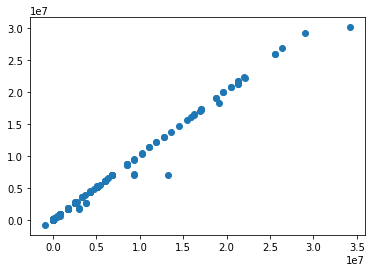

In [607]:
plt.scatter(y_test,lass_modelpred)

In [608]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.9969333797357453


In [609]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 449861.434865932


In [610]:
lasso_model.best_params_

{'alpha': 700}

In [611]:
lasso_model.best_score_

-116691390395.19048

Hyper parameter tuning for XGBRegressor

In [612]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[10:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [613]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-320199041419.6002
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [614]:
xgb_gridpred=xgb_grid.predict(X_test)

In [615]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
1953,5114191,5.025864e+06
754,1704730,1.711755e+06
2937,21309130,2.127155e+07
1910,0,3.055055e+04
80,0,-4.240551e+04
...,...,...
1872,0,-2.402878e+03
2627,0,3.964942e+03
2163,0,1.195180e+04
2165,255710,7.746664e+04


In [616]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.9964520243428839


In [617]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 483823.24528686353


Out of all regression machine learning algorithms Lasso Regressor had best r2 score for strategy3 so we consider it as best performed algorithm and stored it in a data frame named "result"

Calculating the mean of the final prediction of sales inorder to obtain the percentage of sales obtained for strategy3

In [618]:
mean_of_sales_strategy3=result['predictions'].mean()
mean_of_sales_strategy3

2885318.827291006

Calculating the individual percentages for the original and predicted predictions for Srategy3

In [619]:
result['Percentage_of_sales_strategy3']=(result['predictions']/result['predictions'].sum())*100
result

,original test set,predictions,Percentage_of_sales_strategy3
1953,5114191,5.191879e+06,0.483713
754,1704730,1.691889e+06,0.157629
2937,21309130,2.122486e+07,1.977461
1910,0,7.378664e+03,0.000687
80,0,8.521479e+04,0.007939
...,...,...,...
1872,0,8.187827e+03,0.000763
2627,0,5.510588e+03,0.000513
2163,0,2.152752e+04,0.002006
2165,255710,2.242139e+05,0.020889


Calculating the average/mean value of all the final percenatge prediction of sales for Strategy3

In [620]:
Percentage_of_sales_strategy3=result['Percentage_of_sales_strategy3'].mean()
Percentage_of_sales_strategy3

0.26881720430107525

Summary of all above observation of all 3 Strategies for prediction of Sales

In [621]:
Percentage_of_sales_strategy1

0.26881720430107536

In [622]:
Percentage_of_sales_strategy2

0.26881720430107525

In [623]:
Percentage_of_sales_strategy3

0.26881720430107525

Clearly the Strategy1 had slightly better impact on the in terms of percentage of prediction of Sales than Strategy2,Strategy3.
Order:
Strategy1,Strategy2,Strategy2

In [624]:
mean_of_sales_strategy1

2886293.756177943

In [625]:
mean_of_sales_strategy2

2876899.156203307

In [626]:
mean_of_sales_strategy3

2885318.827291006

Clearly the Strategy1 had slightly better impact on the in terms of mean of prediction of Sales than Strategy2,Strategy3.
Order:
Strategy1,Strategy2,Strategy3